In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-01-FUNDAMENTOS/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

'wget' is not recognized as an internal or external command,
operable program or batch file.


# Concurrencia

**Advertencia**: este notebook es prácticamente un resumen de [Speed Up Your Python Program With Concurrency](https://realpython.com/python-concurrency/). Se recomienda bastante leer la fuente original.


**¿Qué es concurrencia?**

Tomado de [una respuesta en Quora](https://www.quora.com/What-is-concurrency-in-programming)

> Concurrency is when two tasks overlap in execution.

>In programming, these situations are encountered:

> - When two processes are assigned to different cores on a machine by the kernel, and both cores execute the process instructions at the same time.
- When more connections arrive before earlier connections are finished, and need to be handled immediately.
More generally, it’s when we need to handle multiple tasks at about the same time.

>That’s it. That’s all concurrency is. Parallel execution is when two tasks start at the same time, making it a special case of concurrent execution.

En resumen, es cuando tareas se sobrelapan. Una tarea puede ser cualquier serie de instrucciones de código. Es importante resaltar que el concepto de paralelismo es un subconjunto de concurrencia. 

Python ofrece 3 maneras diferentes de realizar esa concurrencia:

| Concurrency Type                     | Switching Decision                                                    | Number of Processors |
|--------------------------------------|-----------------------------------------------------------------------|----------------------|
| Pre-emptive multitasking (threading) | The operating system decides when to switch tasks external to Python. | 1                    |
| Cooperative multitasking (asyncio)   | The tasks decide when to give up control.                             | 1                    |
| Multiprocessing (multiprocessing)    | The processes all run at the same time on different processors.       | Many                 |

Ejecutaremos algunas tareas utilizando las distintas formas de concurrencia para entender su aplicabilidad en alguna situación, así como para observar sus ventajas y desventajas.

## IO Bound tasks

Son tareas que retrasan la velocidad a la que nuestros código ejecuta porque frecuentemente están esperando respuesta de un recurso externo, como un archivo local, una conexión a base de datos o una petición http.

**Synchronously**

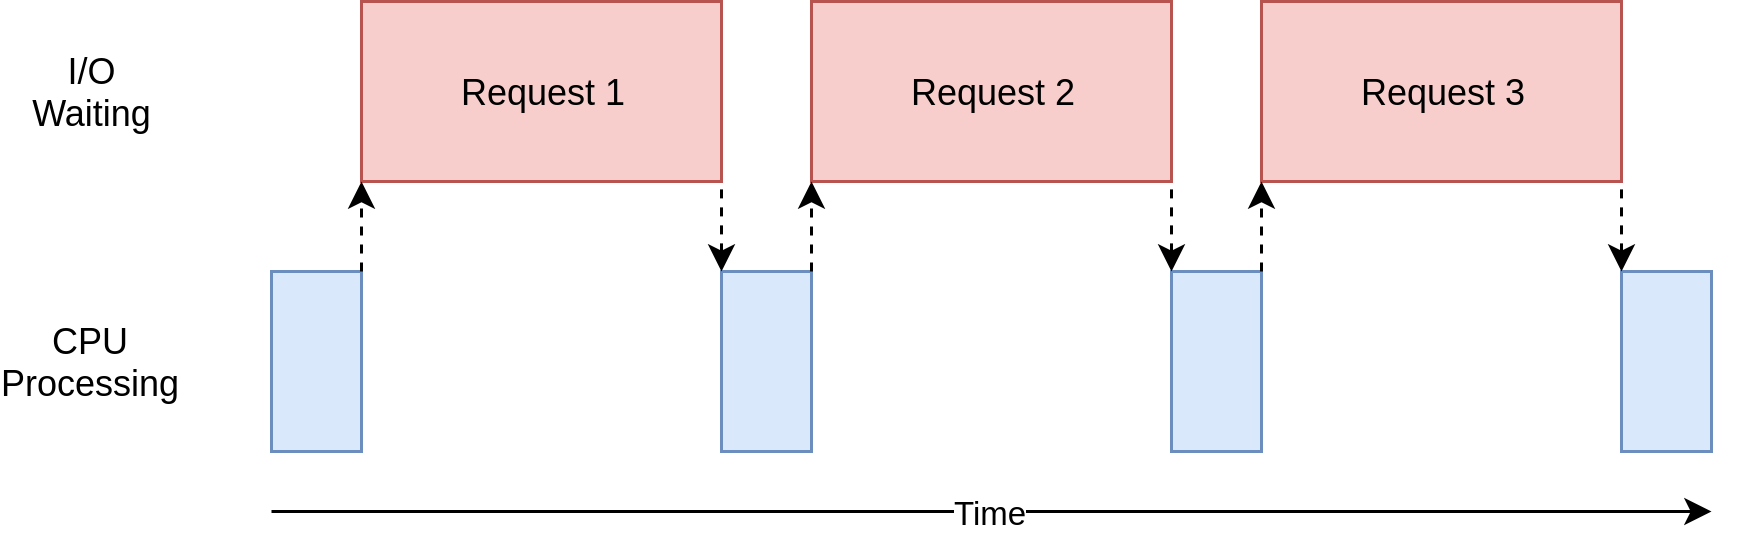

In [2]:
Image("local/imgs/IOBound.png")

In [3]:
%run "local/lib/concurrency/io_synchronous.py"

Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jyth

**Threading**

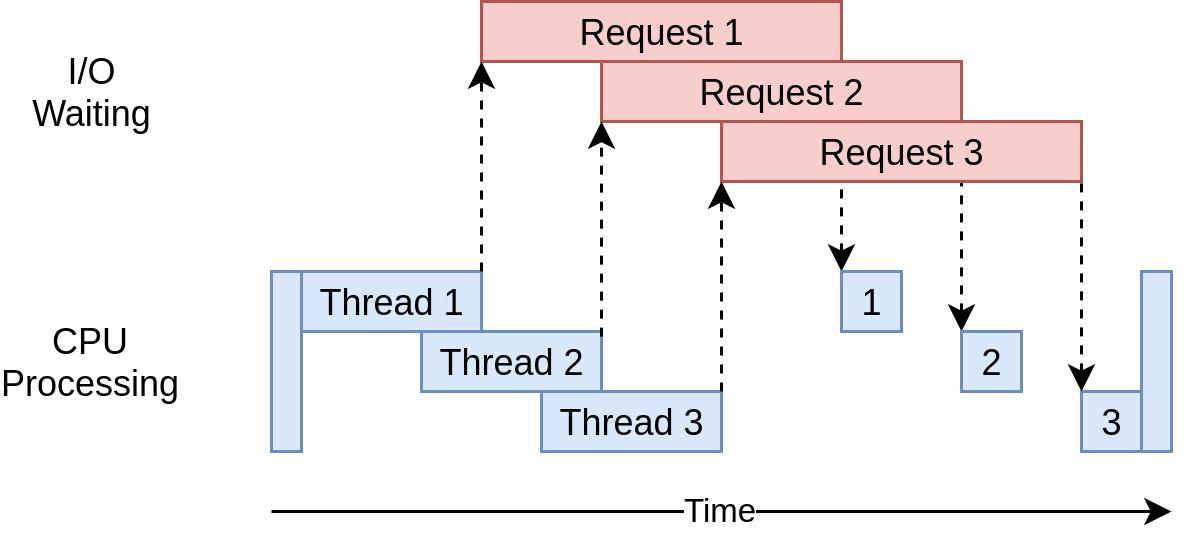

In [4]:
Image("local/imgs/Threading.png")

In [5]:
%run "local/lib/concurrency/io_threading.py"

Read 275 from http://olympus.realpython.org/dice
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 10966 from https://www.jython.org
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jython.org
Read 275 from http://olympus.realpython.org/dice
Read 10966 from https://www.jyth

**Asyncio**

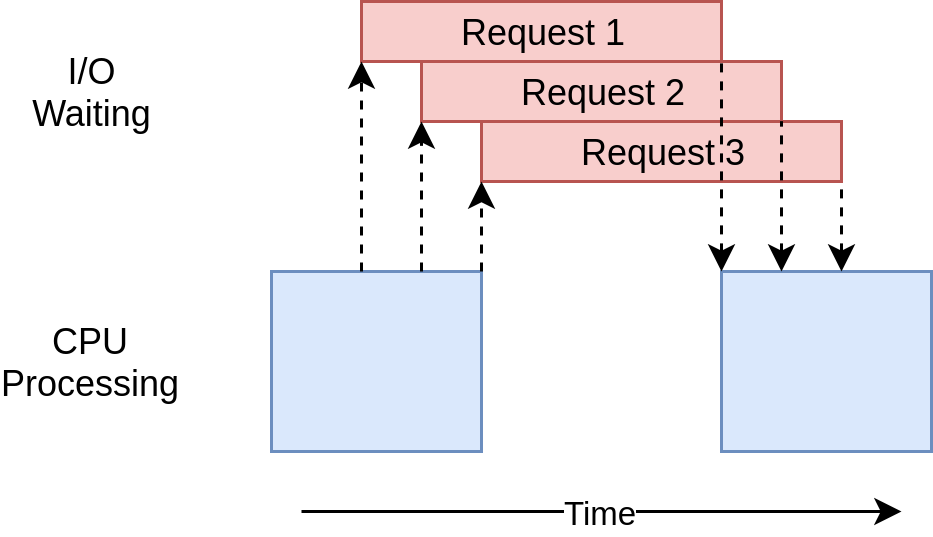

In [6]:
Image("local/imgs/Asyncio.png")

In [8]:
import local.lib.concurrency.io_asyncio as executor

In [ ]:
await executor.main()

Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 from https://www.jython.org
Read 3769 fr

**Multiprocessing**

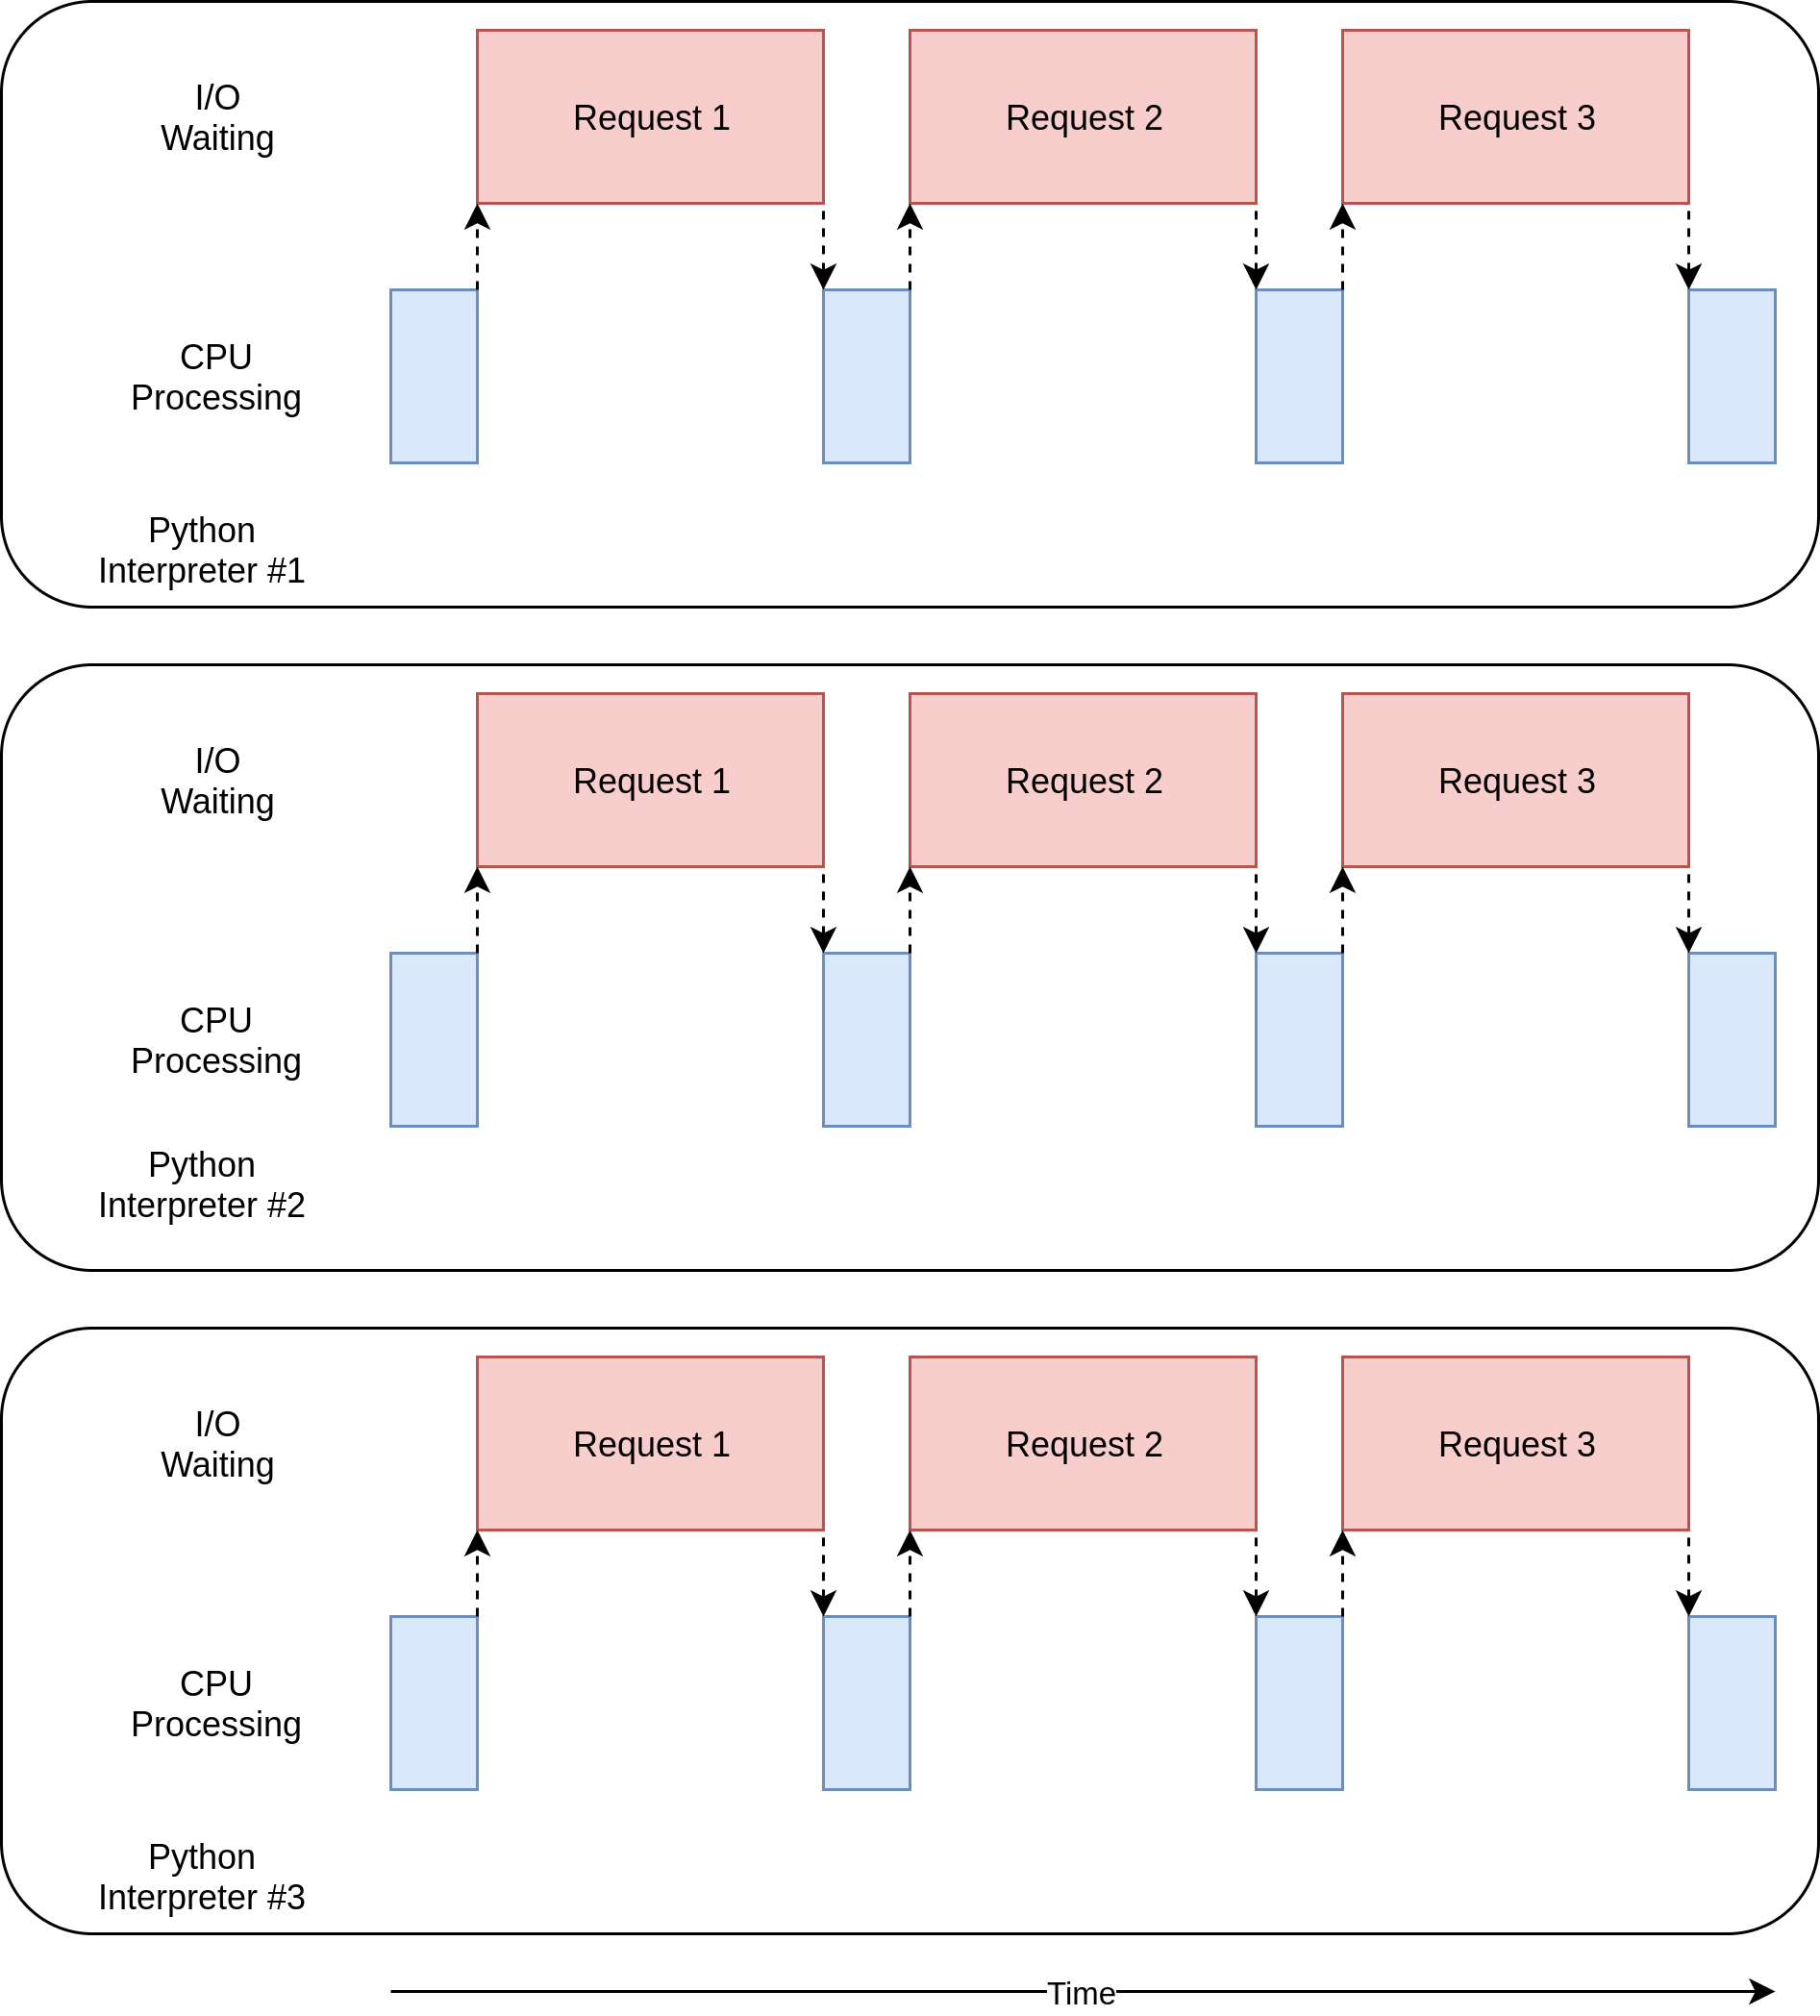

In [ ]:
Image("local/imgs/MProc.png")

In [ ]:
%run "local/lib/concurrency/io_multiprocessing.py"

Downloaded 160 in 3.7105696201324463 seconds


## CPU Bound Task

Podemos pensar como una tarea en la que todos los datos para ejecutarse ya están en la memoria y no tengo que hacer operaciones de lectura o escritura.

**Synchronous**

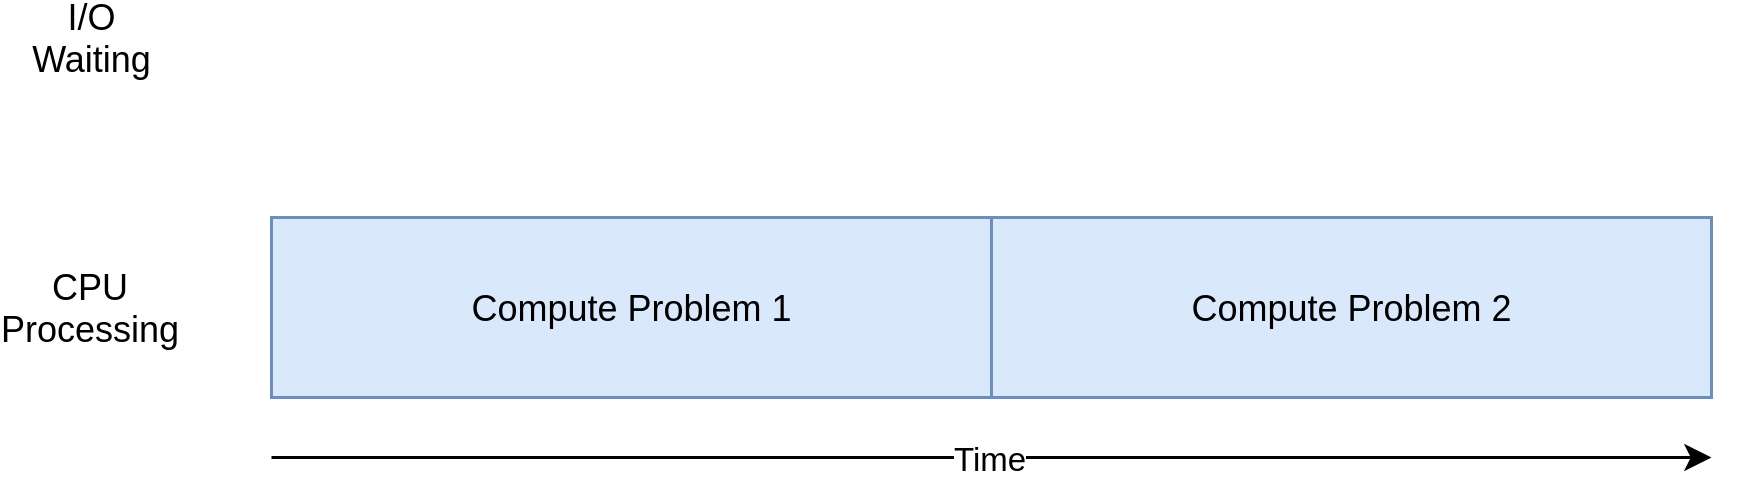

In [ ]:
Image("local/imgs/CPUBound.png")

In [ ]:
%run "local/lib/concurrency/cpu_synchronous.py"

Duration 6.198119878768921 seconds


**Threading**

In [ ]:
%run "local/lib/concurrency/cpu_threading.py"

Duration 6.300612449645996 seconds


**Multiprocessing**

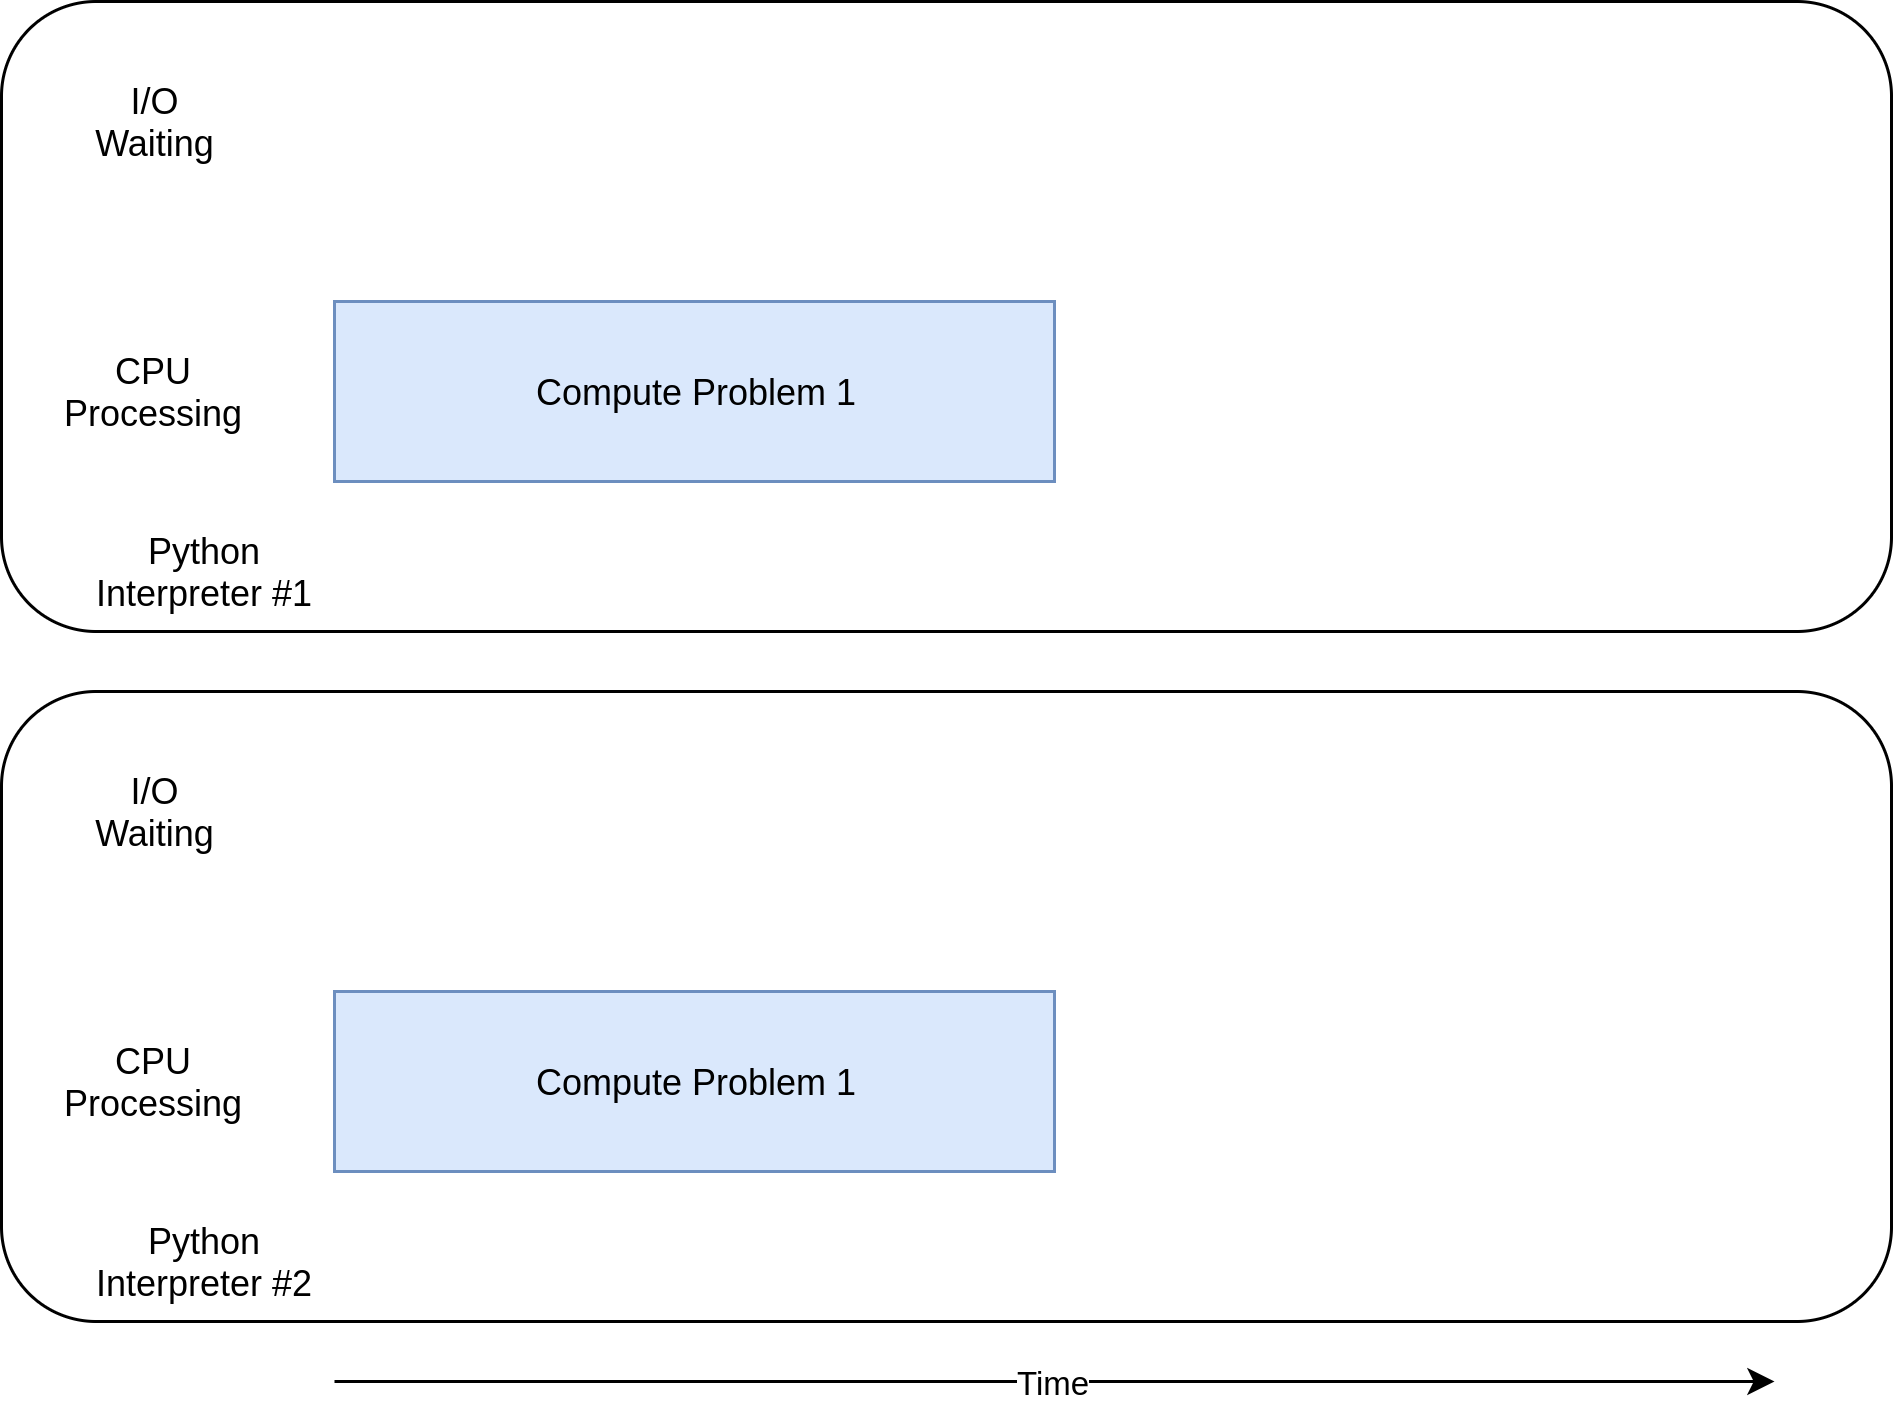

In [ ]:
Image("local/imgs/CPUMP.png")

In [ ]:
%run "local/lib/concurrency/cpu_multiprocessing.py"

Duration 1.7859385013580322 seconds
